<a href="https://colab.research.google.com/github/Ohellay/arbitrary/blob/main/Analysis_of_housing_information.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

[Problem 1] Obtaining a dataset

In [ ]:
df = pd.read_csv("train.csv")

[Problem 2] Investigating the dataset itself

This dataset is a data of house pricing in AMES, Iowa in  The united state of america It has 79 explanatory variable describing every aspect of residential home in Ames,Iowa. The Ames Housing dataset was compiled by Dean De Cock.With its comprehensive set of data points, the dataset contains a wealth of information on properties in the Ames, Iowa area. The dataset includes values on the SalePrice, (which is in dollars and also the  target variable), MSSubClass,MsZoning,LotFrontage,LotAream,..., SalesCondition.

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

The variables are of 3 type of datatype; we have the Float, Intergers and Objects

The dataset target variable  is the SalesPrice

In [ ]:
df["SalePrice"].head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [ ]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


[Problem 4] Dealing with missing values

<Axes: >

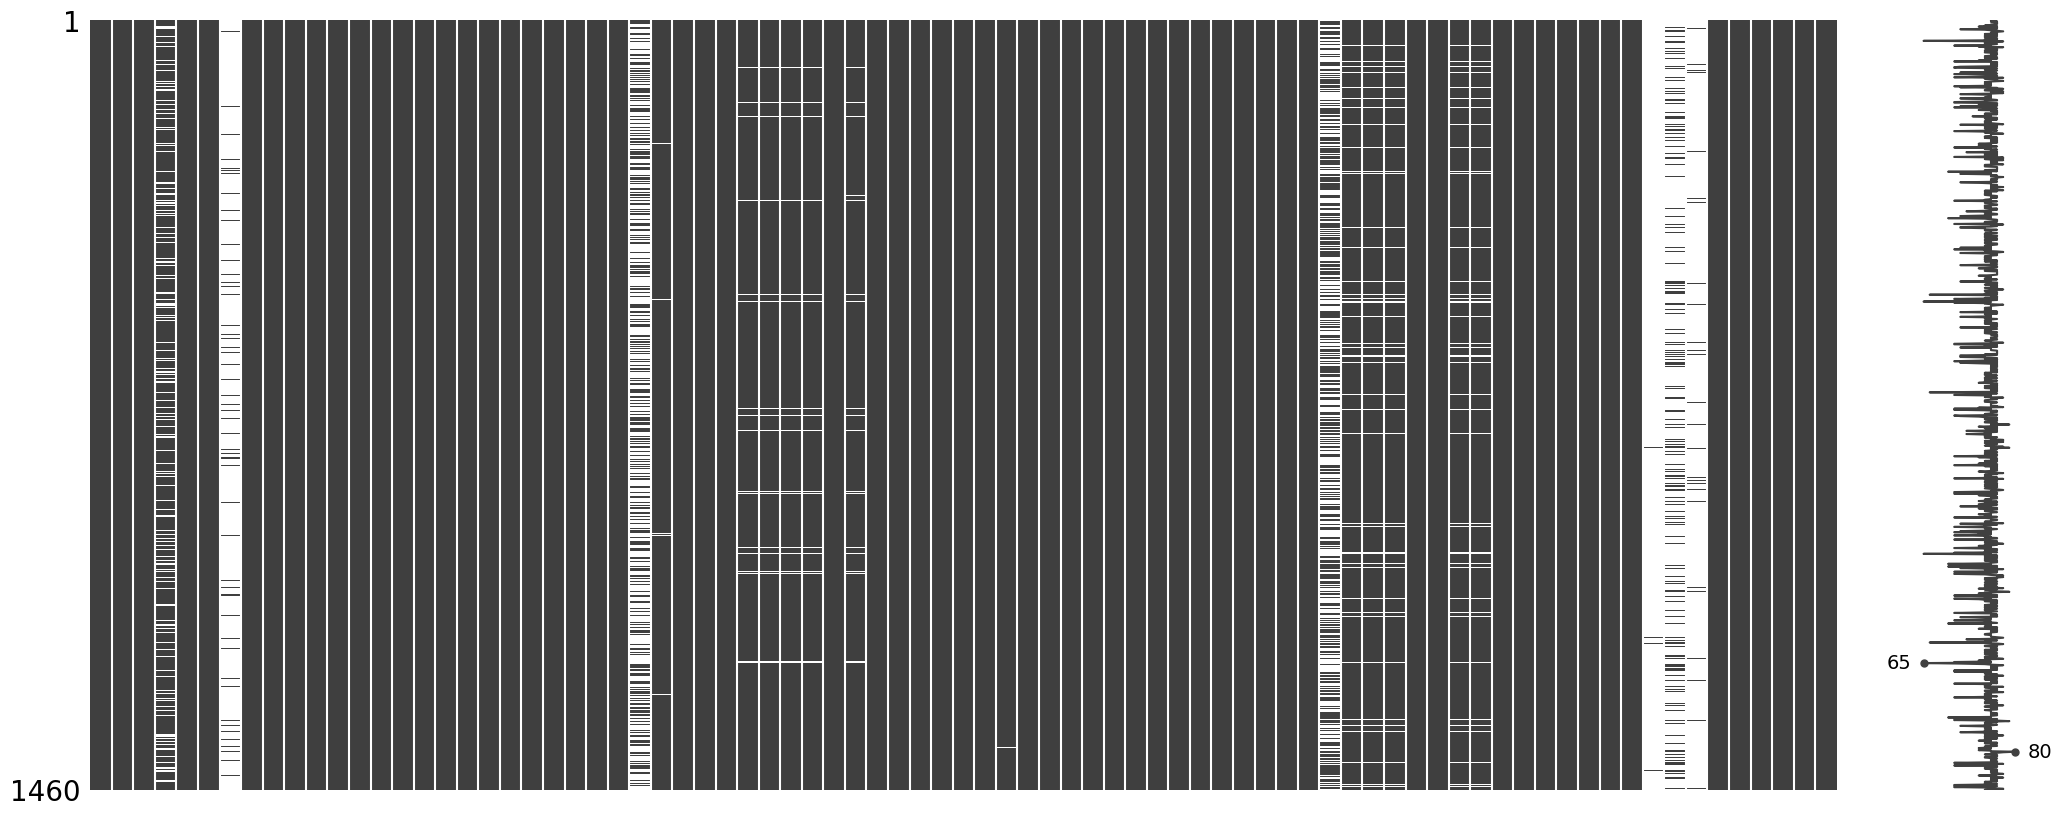

In [ ]:
import missingno as msno
%matplotlib inline

msno.matrix(df)


<Axes: >

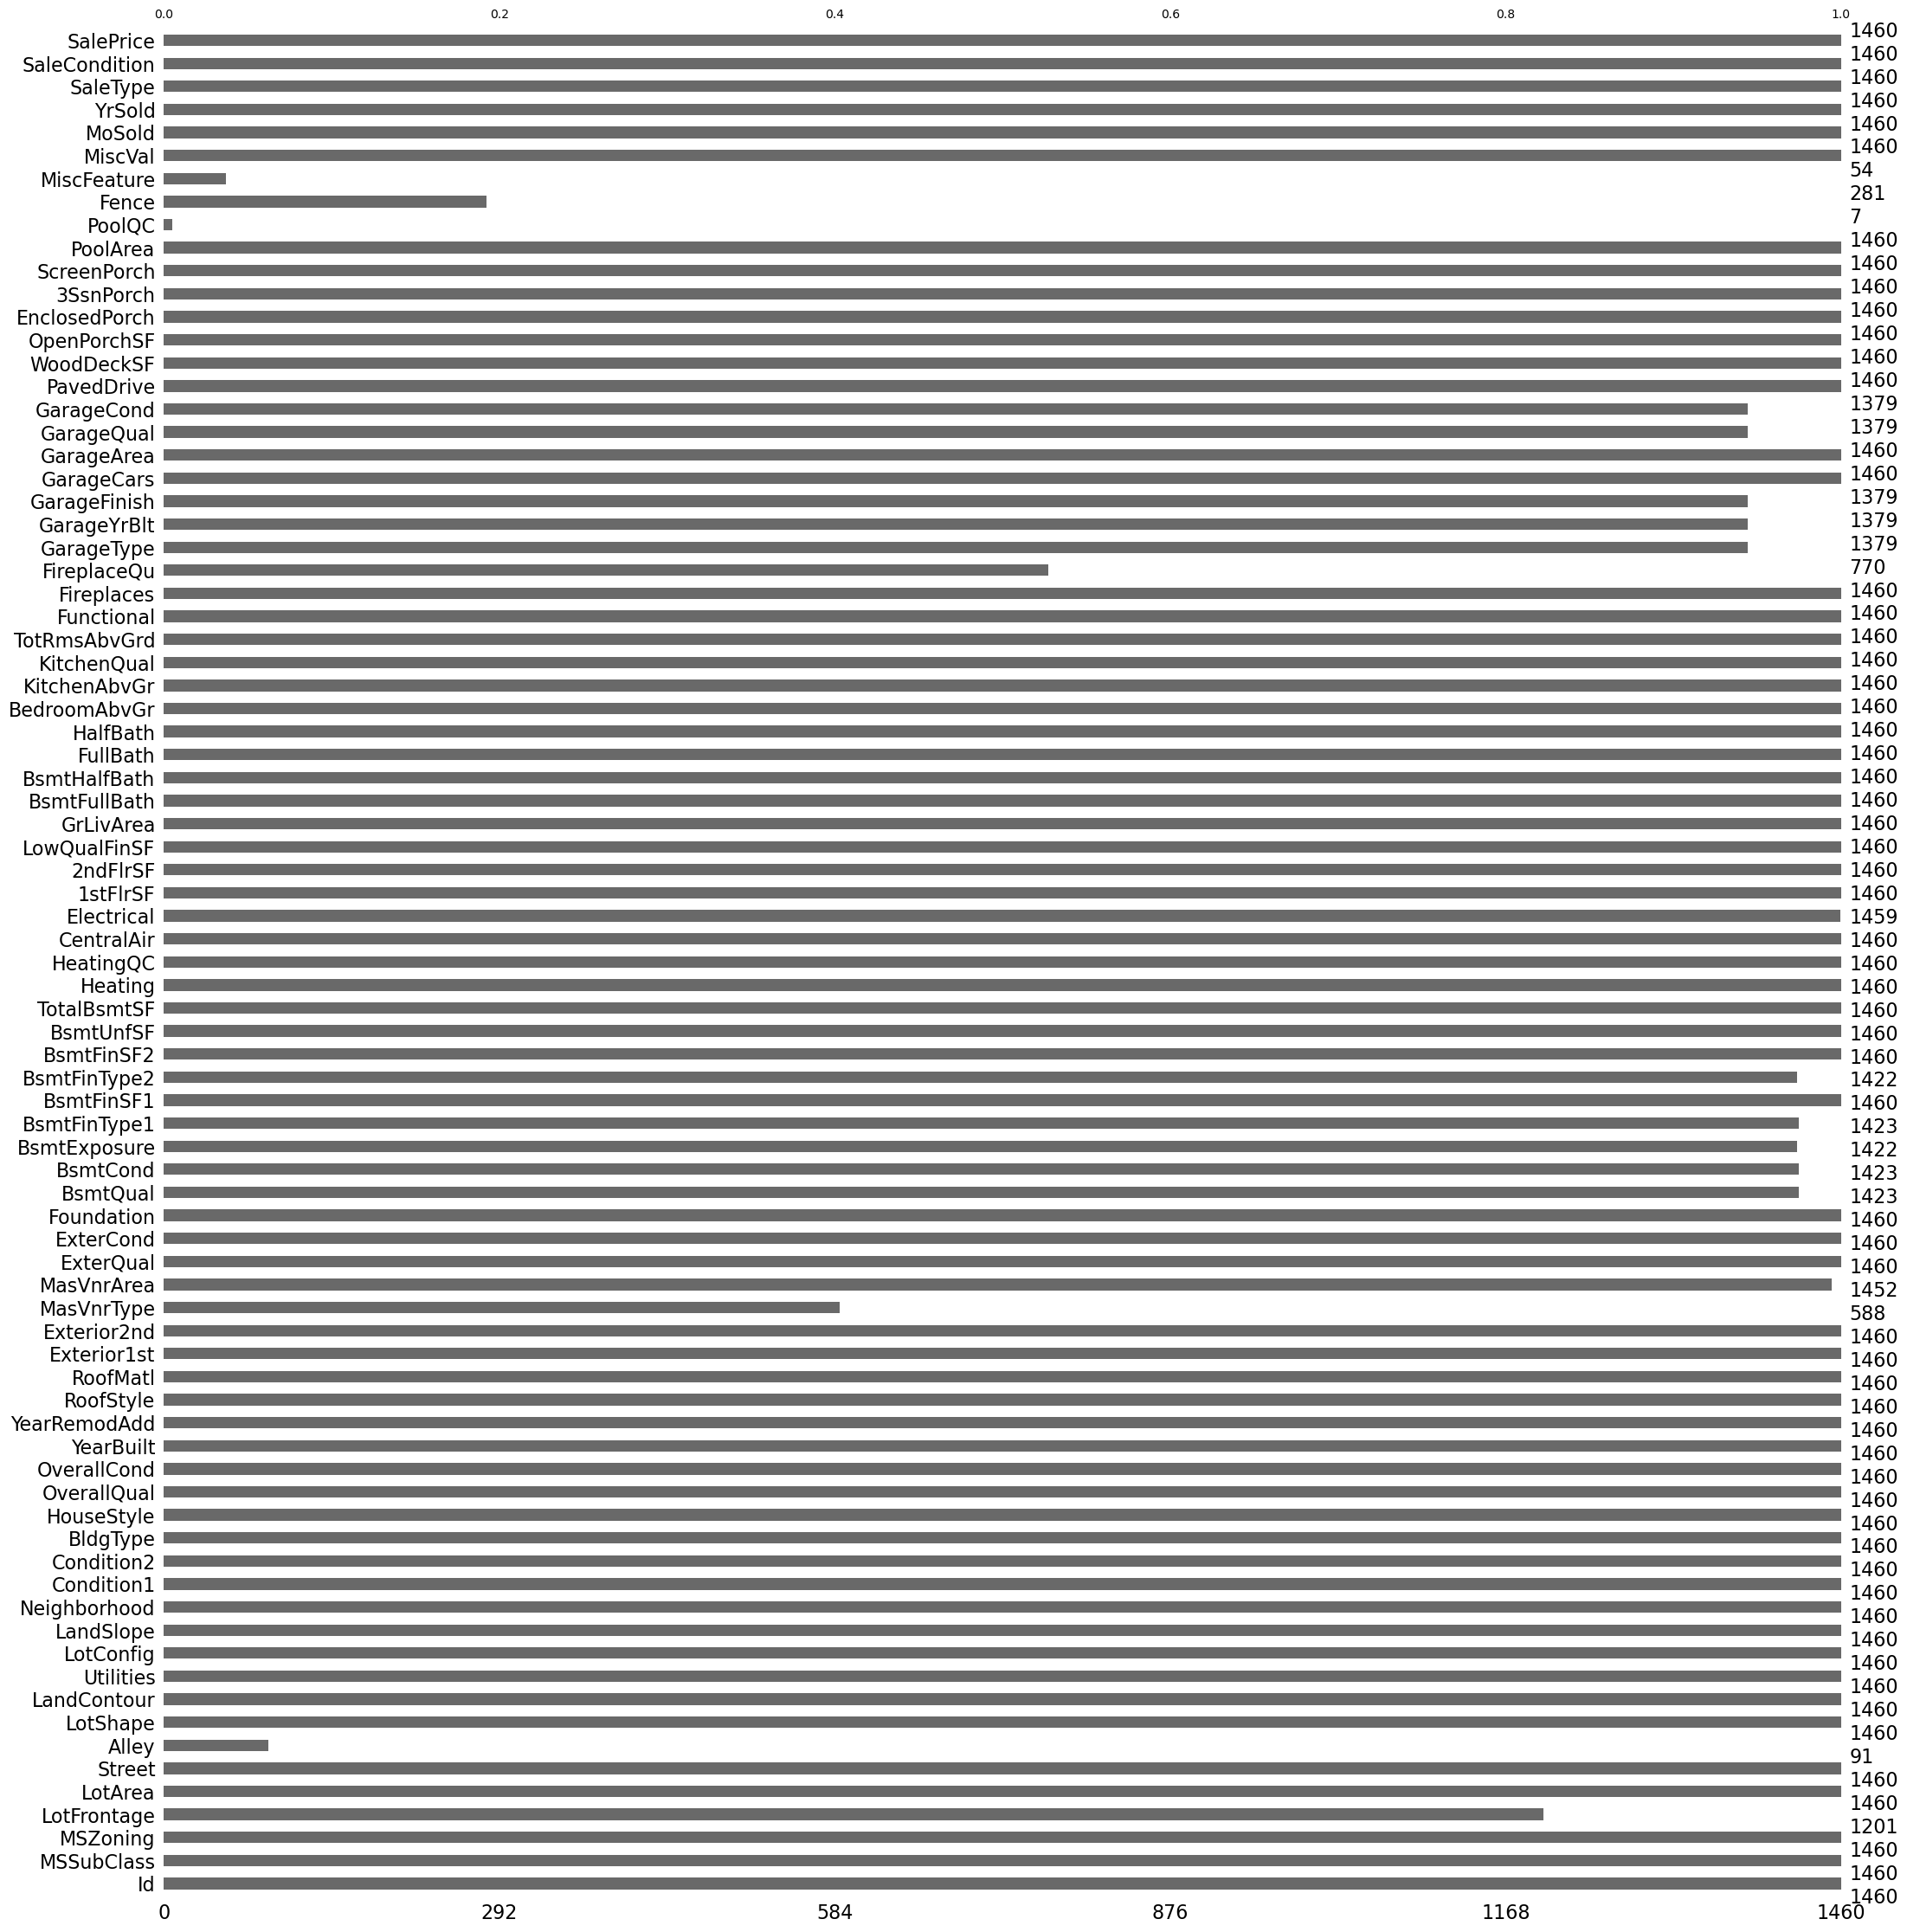

In [ ]:
import missingno as msno
%matplotlib inline

msno.bar(df)

The missingno library allows you to visualize the presence of missing values.

List of missing Numbers

In [ ]:
# check for missing number
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

List Missing numbers only

In [ ]:
not_missing_value = 0
missing_number = df.isnull().sum()
missing_number_only = missing_number[ missing_number > not_missing_value]
print(f"The list of missing number > {not_missing_value}")
print(f"{missing_number_only}")


The list of missing number > 0
LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [ ]:
not_missing_value = float(0.00)
missing_percentage = (df.isnull().mean() * 100).round(2)
missing_percentage_only = missing_percentage[missing_percentage > not_missing_value]
print("Percentage of missing values in each column:")
print(missing_percentage_only)

Percentage of missing values in each column:
LotFrontage     17.74
Alley           93.77
MasVnrType      59.73
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64


Arranging the Missing value from maximum to the Minimum

In [ ]:
sorted_columns = missing_percentage_only.sort_values(ascending=False)
print("Percentage of missing values in each column (sorted from max to min):")
print(sorted_columns)


Percentage of missing values in each column (sorted from max to min):
PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
MasVnrType      59.73
FireplaceQu     47.26
LotFrontage     17.74
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
Electrical       0.07
dtype: float64


In [ ]:
# DataFrame with column names and their missing ratios
missing_info = pd.DataFrame({'Columns': missing_percentage_only.index,'Total': missing_number_only.values, 'MissingRatio': (missing_percentage_only.values/100)})

# Sort the DataFrame based on missing ratios in descending order
df_sorted_missing_info = missing_info.sort_values(by='MissingRatio', ascending=False)

print("Missing ratios in each column (sorted from max to min):")
print(df_sorted_missing_info)

Missing ratios in each column (sorted from max to min):
         Columns  Total  MissingRatio
16        PoolQC   1453        0.9952
18   MiscFeature   1406        0.9630
1          Alley   1369        0.9377
17         Fence   1179        0.8075
2     MasVnrType    872        0.5973
10   FireplaceQu    690        0.4726
0    LotFrontage    259        0.1774
11    GarageType     81        0.0555
12   GarageYrBlt     81        0.0555
13  GarageFinish     81        0.0555
14    GarageQual     81        0.0555
15    GarageCond     81        0.0555
8   BsmtFinType2     38        0.0260
6   BsmtExposure     38        0.0260
7   BsmtFinType1     37        0.0253
5       BsmtCond     37        0.0253
4       BsmtQual     37        0.0253
3     MasVnrArea      8        0.0055
9     Electrical      1        0.0007


In [ ]:
threshold = 5
# Calculates columns with 5 or more missing values
missing_feature = missing_number[missing_number > threshold].index

print(f"The List of Feature with {threshold} or more missing:: ")
print(missing_feature)


The List of Feature with 5 or more missing:: 
Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'],
      dtype='object')


To Delete features (columns) that have 5 or more missing values.

In [ ]:
dropped_feature_dataframe = df.drop(missing_feature,axis=1)
display(dropped_feature_dataframe.head())

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


The Number of sample remaining:: 1459


<Axes: >

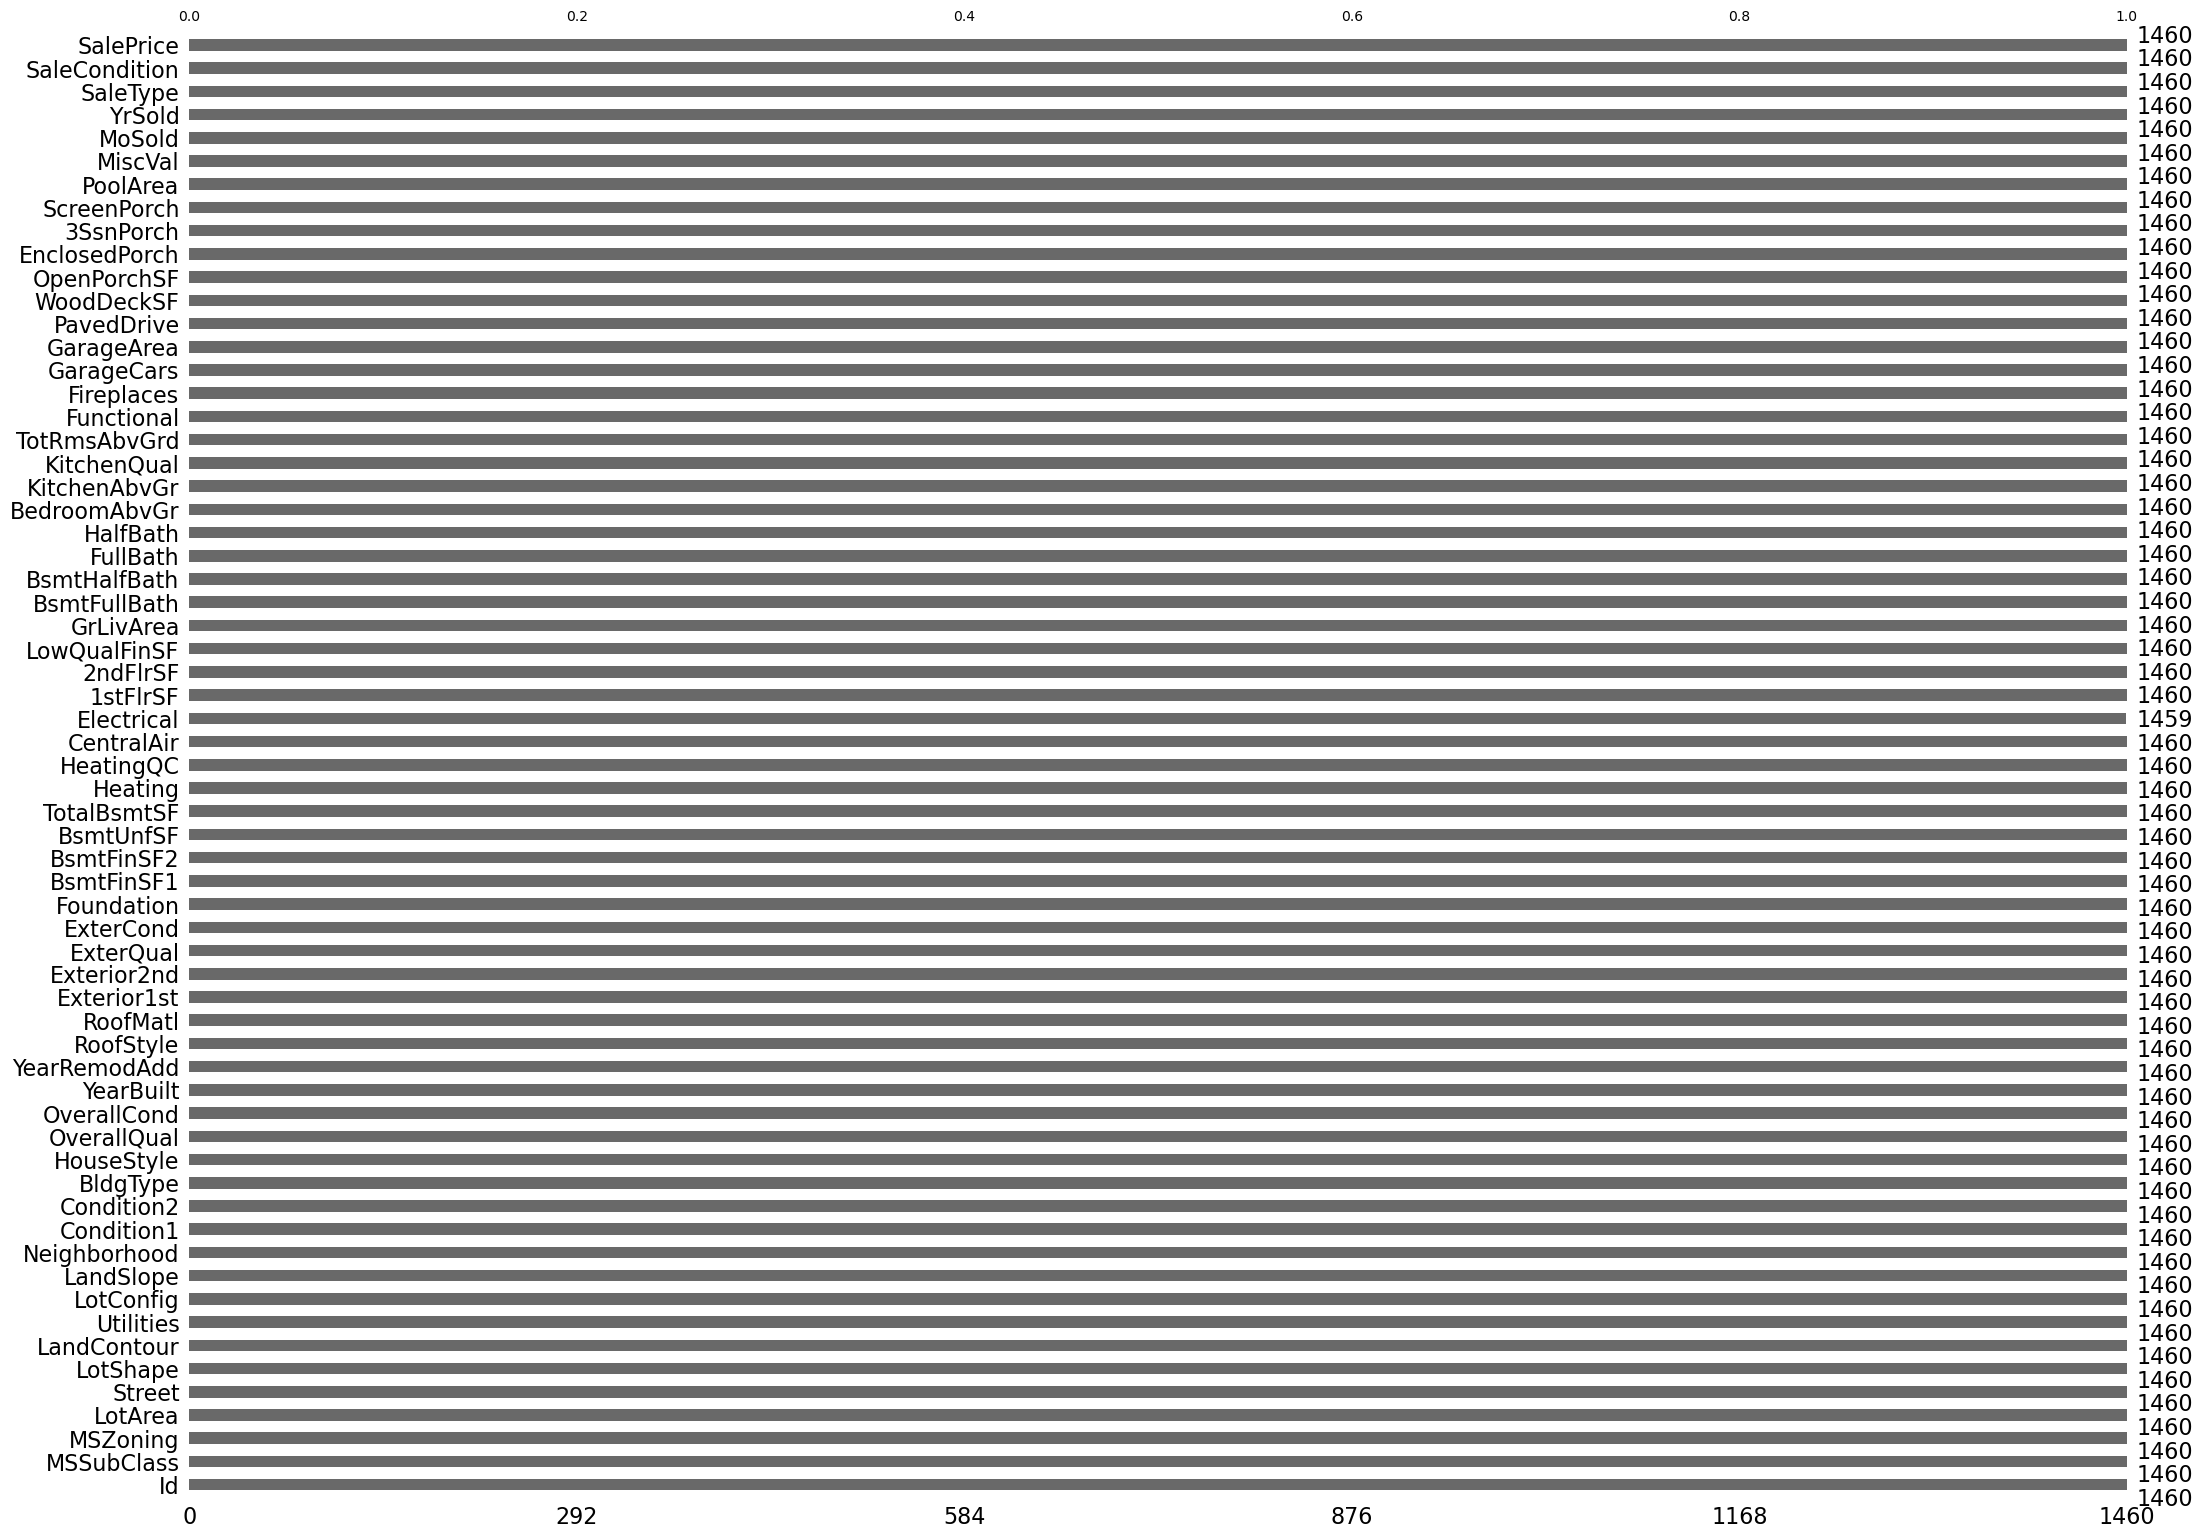

In [ ]:
row_dropped_feature_dataframe  = dropped_feature_dataframe.dropna(axis=0)
row_dropped_feature_dataframe = row_dropped_feature_dataframe.reset_index(drop = True)
print(f"The Number of sample remaining:: {len(row_dropped_feature_dataframe)}")
#visualize the dropped features
msno.bar(dropped_feature_dataframe)

[Problem 5] Researching terminology

### Kurtosis

Kurtosis is a statistical measure that describes the distribution of data points in a dataset. It provides information about the tails and sharpness of the distribution compared to a normal distribution.
> A positive value tells you that you have heavy-tails (i.e. a lot of data in your tails).(https://www.statisticshowto.com/)
>
A negative value means that you have light-tails (i.e. little data in your tails)(https://www.statisticshowto.com/)
>There are three types of kurtosis: mesokurtic, leptokurtic, and platykurtic.
> The peak is the tallest part of the distribution, and the tails are the ends of the distribution.
> Mesokurtic: Distributions that are moderate in breadth and curves with a medium peaked height.When kurtosis is equal to 3, the distribution is mesokurtic, It is also known as Normal distribution
> Leptokurtic: More values in the distribution tails and more values close to the mean (i.e., sharply peaked with heavy tails)A leptokurtic distribution has a higher peak (thin bell) and taller (i.e., fatter and heavy) tails than a normal distribution.
> Platykurtic: Fewer values in the tails and fewer values close to the mean (i.e., the curve has a flat peak and has more dispersed scores with lighter tails).When kurtosis is equal to 0, the distribution is platykurtic.Platykurtic distributions have negative kurtosis values.(https://www.simplypsychology.org/).

### SKEWNESS
Skewness is a measure of the asymmetry of a distribution. A distribution is asymmetrical when its left and right side are not mirror images.
>  
A distribution can have right (or positive), left (or negative), or zero skewness. A right-skewed distribution is longer on the right side of its peak, and a left-skewed distribution is longer on the left side of its pea
> When a distribution has zero skew, it is symmetrical. Its left and right sides are mirror images.(https://www.scribbr.com/statistics/skewness)

[Problem 6] Confirming distribution

Skewness=1.88 Kurtosis=6.54


<Axes: xlabel='SalePrice', ylabel='Count'>

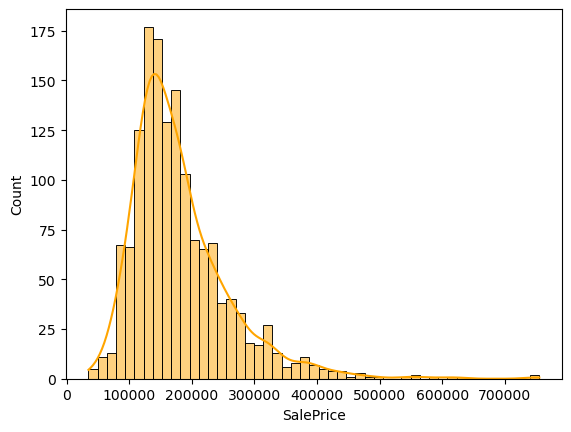

In [ ]:
target = df["SalePrice"]
print(f"Skewness={target.skew():.2f} Kurtosis={target.kurtosis():.2f}")
display(sns.histplot(target,kde=True, color="orange" ))

>The sale price has  a skewness of 1.88  and a Kurtosis of 6.54,  It is said to be a positive skewness, It indicates a distribution with a longer or fatter right tail compared to the left tail.In simpler terms, the majority of the values may be concentrated on the left side, while there are a few relatively larger values on the right side. while It kurtosis suggests that the distribution with heavy tails and a relatively peaked center compared to a normal distribution. The positive kurtosis indicates a distribution with tails that are heavier than those of a normal distribution.
It is often associated with the presence of outliers or extreme values in the dataset.

Logarithm Transformation

Skewness=0.12 Kurtosis=0.81


<Axes: xlabel='SalePrice', ylabel='Count'>

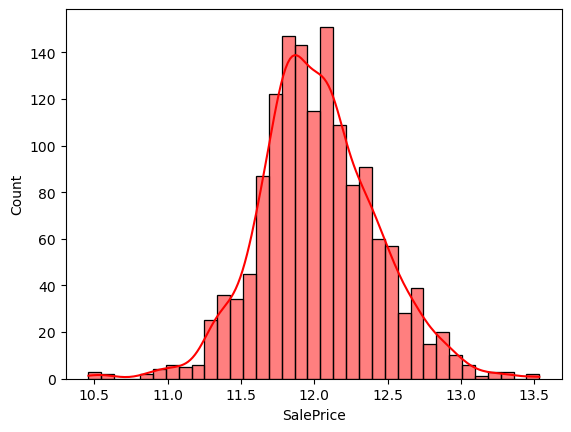

In [ ]:
target_log_transformed = np.log(target)
print(f"Skewness={target_log_transformed.skew():.2f} Kurtosis={target_log_transformed.kurtosis():.2f}")
display(sns.histplot(target_log_transformed ,kde=True, color="red" ))

It logarithms shows that the skewness is 0.12 and Kurtosis of 0.81, The distribution became closer to the normal

[Problem 7] Confirming the correlation coefficient

### DEFINITION OF FEATURES
- MSSubClass: Identifies the type of dwelling involved in the sale.
- MSZoning: Identifies the general zoning classification of the sale.
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access to property
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to various conditions
- Condition2: Proximity to various conditions (if more than one is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Rates the overall material and finish of the house
- OverallCond: Rates the overall condition of the house
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Evaluates the quality of the material on the exterior
- ExterCond: Evaluates the present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Evaluates the height of the basement
- BsmtCond: Evaluates the general condition of the basement
- BsmtExposure: Refers to walkout or garden level walls
- BsmtFinType1: Rating of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Rating of basement finished area (if multiple types)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Bedrooms above grade (does NOT include basement bedrooms)
- Kitchen: Kitchens above grade
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality (Assume typical unless deductions are warranted)
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other --categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold (MM)
- YrSold: Year Sold (YYYY)
- SaleType: Type of sale
- SaleCondition: Condition of sale


Analyzing a correlation matrix can help identify which variables are strongly correlated, providing insights into the relationships within the dataset.

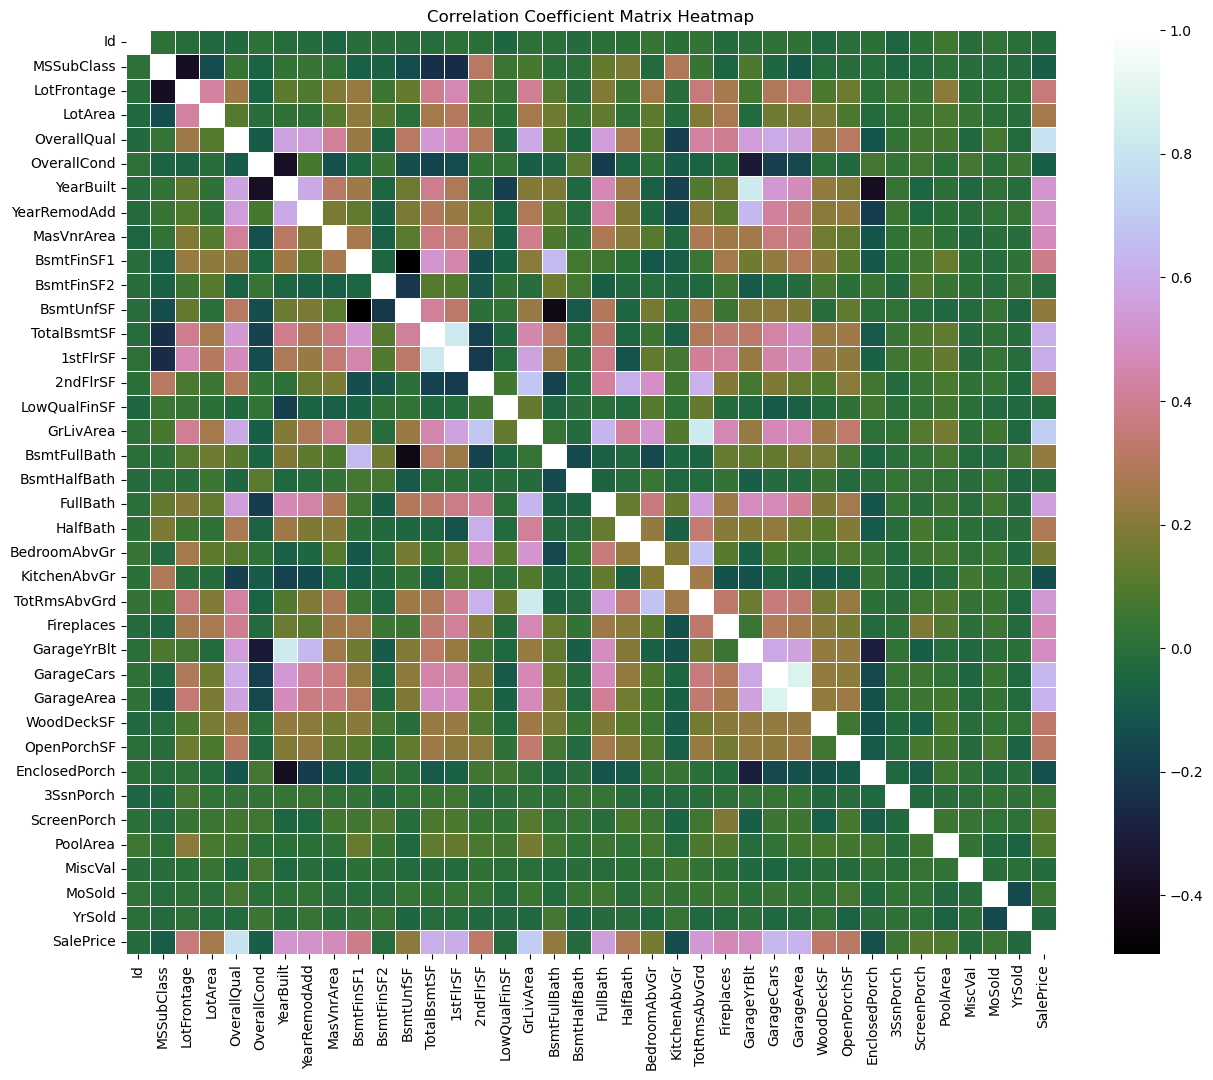

In [ ]:
# Calculate the correlation coefficient matrix
correlation_matrix = df.corr(numeric_only=True)

# Create a heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=False, cmap="cubehelix", linewidths=0.5)
plt.title('Correlation Coefficient Matrix Heatmap')
plt.show()


In [ ]:
# To Select 10 Other features that have a high correlation with the target variable:- SalePrice
target_variable = "SalePrice"
# Select the top 10 features with the highest correlation with the target variable
top_correlated_features = correlation_matrix[target_variable].sort_values(ascending=False)[1:11]
print(top_correlated_features)

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,1710,2,548,856,856,2,8,2003,2003
1,1262,2,460,1262,1262,2,6,1976,1976
2,1786,2,608,920,920,2,6,2001,2002
3,1717,3,642,756,961,1,7,1915,1970
4,2198,3,836,1145,1145,2,9,2000,2000


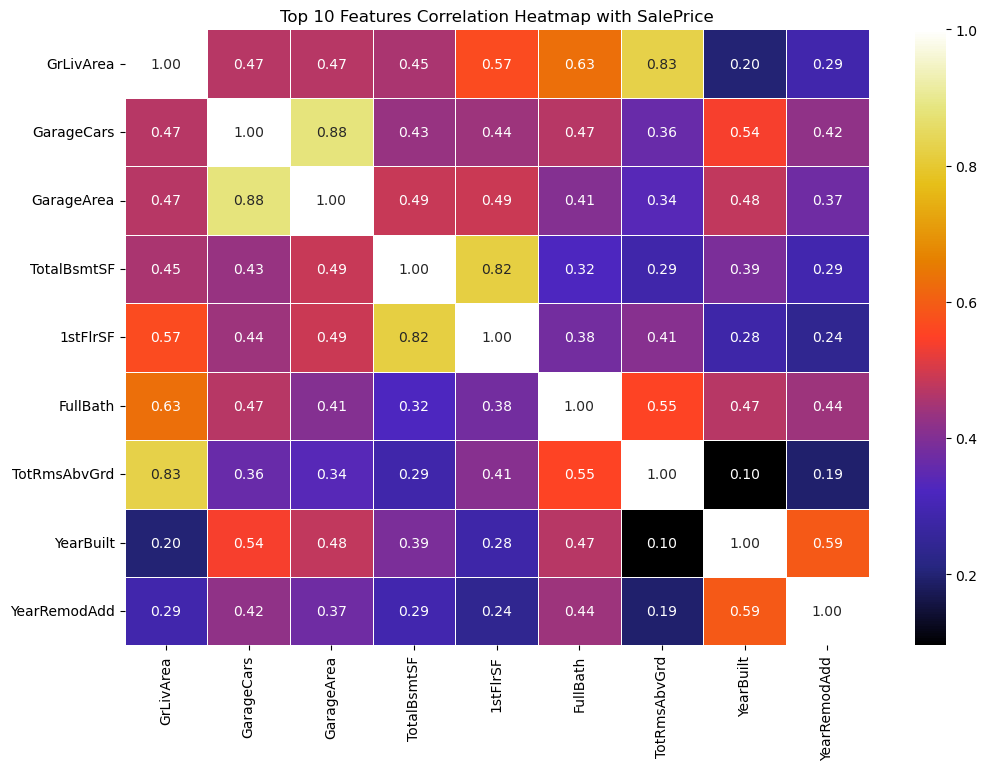

In [ ]:
df_sale_price = df[top_correlated_features[1:11].index]
display(df_sale_price.head())

# To extract the correlation matrix for these top features
top_correlation_matrix = df[top_correlated_features[1:11].index].corr(numeric_only=True)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(top_correlation_matrix, annot=True, cmap="CMRmap", fmt=".2f", linewidths=0.5)
plt.title("Top 10 Features Correlation Heatmap with SalePrice")
plt.show()

The list of selected features and their correlation coefficients with the target variable "SalePrice" suggests that these features are positively correlated with the target variable.  briefly interpreting the correlation coefficients:

1. **OverallQual (0.790982):** The overall quality of the house is strongly positively correlated with the sale price. As the overall quality increases, the sale price tends to increase.

2. **GrLivArea (0.708624):** The above-ground living area square footage is moderately positively correlated with the sale price. Larger living areas are associated with higher sale prices.

3. **GarageCars (0.640409):** The size of the garage in terms of car capacity is moderately positively correlated with the sale price. A larger garage tends to be associated with a higher sale price.

4. **GarageArea (0.623431):** The size of the garage in square footage is moderately positively correlated with the sale price. More spacious garages are associated with higher sale prices.

5. **TotalBsmtSF (0.613581):** The total basement square footage is moderately positively correlated with the sale price. Larger basements tend to be associated with higher sale prices.

6. **1stFlrSF (0.605852):** The first-floor square footage is moderately positively correlated with the sale price. Larger first floors are associated with higher sale prices.

7. **FullBath (0.560664):** The number of full bathrooms is positively correlated with the sale price. More full bathrooms are associated with higher sale prices.

8. **TotRmsAbvGrd (0.533723):** The total number of rooms above ground is positively correlated with the sale price. Houses with more rooms tend to have higher sale prices.

9. **YearBuilt (0.522897):** The year the house was built is positively correlated with the sale price. Generally, newer houses tend to have higher sale prices.

10. **YearRemodAdd (0.507101):** The year of remodeling or addition is positively correlated with the sale price. Houses that have been more recently remodeled or had additions tend to have higher sale prices.

In Conclusion, the 10 selected features  to represent various aspects of a house that contribute to its value. These aspects include overall quality, size of living areas, garage capacity, basement size, number of bathrooms, number of rooms, and the age of the house or the last remodeling. Higher values in these features are generally associated with higher sale prices.

 * Find 3 combinations of the 10 selected features that have high correlation coefficients with each other.

The GarageArea and the Garage car show an highly correlated coefficient, 1stFIrst and TotalBsmtSF are also having highly correlated coefficient,TotRmsAbvGrd and GridvArea are highly correlated coefficient.